In [1]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)** 2)

In [2]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0,]     # correct answer is 2
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('When predicted number is 2, MSE= ',mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print('When predicted number is 7, MSE= ',mean_squared_error(np.array(y), np.array(t)))

When predicted number is 2, MSE=  0.09750000000000003
When predicted number is 7, MSE=  0.5975


In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0,]     # correct answer is 2
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('When predicted number is 2, CE= ',cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print('When predicted number is 7, CE= ',cross_entropy_error(np.array(y), np.array(t)))

When predicted number is 2, CE=  0.510825457099338
When predicted number is 7, CE=  2.302584092994546


In [5]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [6]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [7]:
# bad example
def numerical_diff(f, x):
    h = 10e-50      # rounding error = 0.0
    return (f(x+h) - f(x)) / h

In [8]:
# good example
def numerical_diff(f, x):
    h = 10e-4       # 0.0001
    return (f(x+h) - f(x-h)) / 2*h

In [9]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

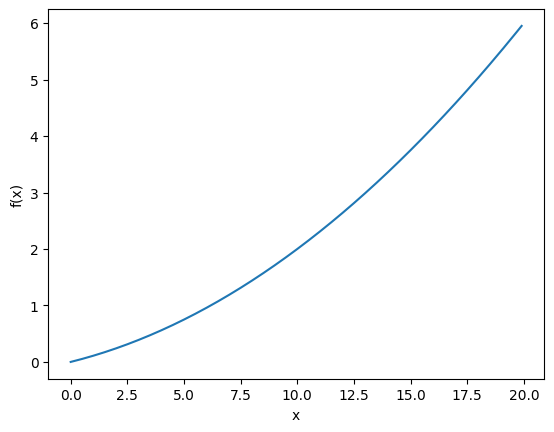

In [10]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [11]:
numerical_diff(function_1, 5)
numerical_diff(function_1, 10)

2.9999999999996695e-07

In [12]:
def function_2(x):
    return np.sum(x**2)

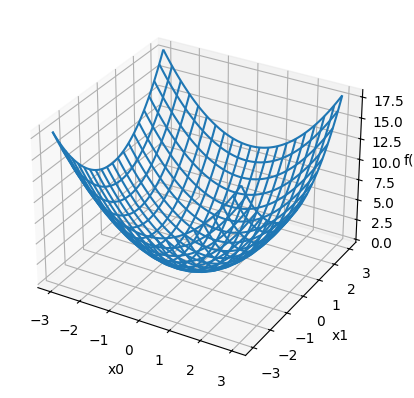

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定義函數 f(x0, x1) = x0^2 + x1^2
def function_2d(x0, x1):
    return x0**2 + x1**2

# 生成數據
x0 = np.linspace(-3, 3, 100)
x1 = np.linspace(-3, 3, 100)
x0, x1 = np.meshgrid(x0, x1)
z = function_2d(x0, x1)

# 繪製三維圖
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x0, x1, z, rstride=5, cstride=5)

# 設置標籤
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')

plt.show()


In [14]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

5.999999999998451e-06

In [15]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1 

numerical_diff(function_tmp2, 4.0)

8.000000000000896e-06

In [16]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 的計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 的計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [17]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [18]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [19]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1)


array([-6.11110793e-10,  8.14814391e-10])

In [20]:
# import numpy as np
# import matplotlib.pylab as plt
# from gradient_2d import numerical_gradient

# def gradient_descent(f, init_x, lr=0.01, step_num=100):
#     x = init_x
#     x_history = []

#     for i in range(step_num):
#         x_history.append(x.copy())

#         grad = numerical_gradient(f, x)
#         x -= lr * grad

#     return x, np.array(x_history)

# def function_2(x):
#     return x[0]**2 + x[1]**2

# init_x = np.array([-3.0, -4.0])    

# lr = 0.1
# step_num = 20
# x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

# # 計算等高線
# x0 = np.arange(-5, 5, 0.1)
# x1 = np.arange(-5, 5, 0.1)
# X, Y = np.meshgrid(x0, x1)
# Z = X**2 + Y**2

# # 畫出等高線
# plt.contour(X, Y, Z, levels=10, colors='gray', linestyles='dashed')

# # 畫出梯度下降的路徑
# plt.plot(x_history[:,0], x_history[:,1], 'o')

# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
# plt.xlabel("X0")
# plt.ylabel("X1")
# plt.show()


In [21]:
init_x = np.array([-3.0, -4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13,  1.29524862e+12])

In [22]:
init_x = np.array([-3.0, -4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994, -3.99999992])

In [23]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 用高斯分布進行初始化

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [24]:
net = simpleNet()
print(net.W)

[[-0.57012477 -0.97875078 -0.7552748 ]
 [-1.06645014  1.06925387 -0.5499711 ]]


In [25]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
np.argmax(p)

[-1.30187999  0.37507801 -0.94813887]


1

In [26]:
t = np.array([1, 0, 0])
net.loss(x, t)

2.0507384106221176

In [27]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[-0.52281573  0.41287616  0.10993957]
 [-0.78422359  0.61931424  0.16490935]]


In [28]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

In [33]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # Initialization
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y
    
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

iter 0, loss 2.3032741718602523
iter 100, loss 2.2892590854483297
iter 200, loss 2.2848957987883174
iter 300, loss 2.2632318133700586
iter 400, loss 2.1491750937781187
iter 500, loss 1.9578435485288812
iter 600, loss 1.6926612777175658
iter 700, loss 1.5005632014054109
iter 800, loss 1.2357018674208922
iter 900, loss 0.9855645220314367
iter 1000, loss 0.9765930905829465
iter 1100, loss 0.9026867129260455
iter 1200, loss 0.9966827989101423
iter 1300, loss 0.9907707019391507
iter 1400, loss 0.8442187374884391
iter 1500, loss 0.7410749109334164
iter 1600, loss 0.645436137133701
iter 1700, loss 0.5715051901638052
iter 1800, loss 0.5930564356651957
iter 1900, loss 0.5421732850377358
iter 2000, loss 0.4490616848805167
iter 2100, loss 0.40227982215214303
iter 2200, loss 0.5008541758454741
iter 2300, loss 0.516335246482481
iter 2400, loss 0.4635756319211032
iter 2500, loss 0.5510077077144219
iter 2600, loss 0.5969765007301753
iter 2700, loss 0.4627541228977362
iter 2800, loss 0.455590057455606

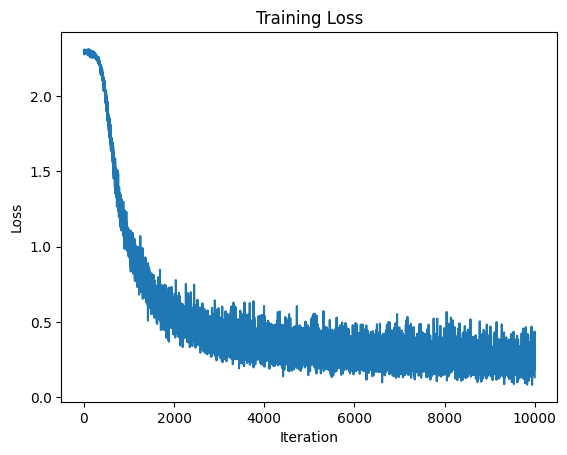

In [36]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

train_loss_list = []

# hyperparameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.05
network = TwoLayerNet(input_size=784, hidden_size=50,output_size=10)

for i in range(iters_num):
    # get mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % 100 == 0:
        print(f"iter {i}, loss {loss}")

# 繪圖
plt.plot(np.arange(iters_num), train_loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

Epoch 1: train acc = 0.1124, test acc = 0.1135
Epoch 2: train acc = 0.4713, test acc = 0.4691
Epoch 3: train acc = 0.7923, test acc = 0.7971
Epoch 4: train acc = 0.8556, test acc = 0.8603
Epoch 5: train acc = 0.8769, test acc = 0.8787
Epoch 6: train acc = 0.8904, test acc = 0.8938
Epoch 7: train acc = 0.8972, test acc = 0.9003
Epoch 8: train acc = 0.9033, test acc = 0.9057
Epoch 9: train acc = 0.9075, test acc = 0.9099
Epoch 10: train acc = 0.9112, test acc = 0.9126
Epoch 11: train acc = 0.9146, test acc = 0.9160
Epoch 12: train acc = 0.9168, test acc = 0.9187
Epoch 13: train acc = 0.9192, test acc = 0.9214
Epoch 14: train acc = 0.9204, test acc = 0.9225
Epoch 15: train acc = 0.9233, test acc = 0.9244
Epoch 16: train acc = 0.9251, test acc = 0.9264
Epoch 17: train acc = 0.9276, test acc = 0.9284


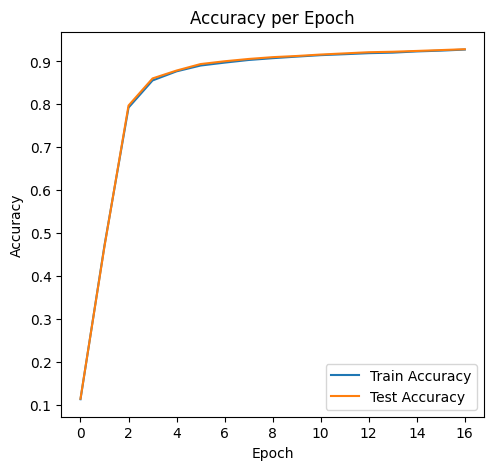

In [42]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)


# hyperparameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.05
network = TwoLayerNet(input_size=784, hidden_size=50,output_size=10)

for i in range(iters_num):
    # get mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"Epoch {int(i // iter_per_epoch) + 1}: train acc = {train_acc:.4f}, test acc = {test_acc:.4f}")


# 繪圖
epochs = range(len(train_acc_list))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc_list, label='Train Accuracy')
plt.plot(epochs, test_acc_list, label='Test Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()